In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
try:
    df = pd.read_csv("data/sitka_weather_07-2018_simple.csv")
except FileNotFoundError:
    print("the file 'jupyter_notebook/DataAnalysis/data/sitka_weather_07-2018_simple.csv' not found")

In [3]:
df.head()
#PRCP = precipitation = amount of rain in inches


,STATION,NAME,DATE,PRCP,TAVG,TMAX,TMIN
0,USW00025333,"SITKA AIRPORT, AK US",2018-07-01,0.25,NaN,62,50
1,USW00025333,"SITKA AIRPORT, AK US",2018-07-02,0.01,NaN,58,53
2,USW00025333,"SITKA AIRPORT, AK US",2018-07-03,0.00,NaN,70,54
3,USW00025333,"SITKA AIRPORT, AK US",2018-07-04,0.00,NaN,70,55
4,USW00025333,"SITKA AIRPORT, AK US",2018-07-05,0.00,NaN,67,55


# THE COLUMN OF TAVG IS EMPTY

In [4]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [5]:
df.head()

,STATION,NAME,DATE,PRCP,TAVG,TMAX,TMIN
0,USW00025333,"SITKA AIRPORT, AK US",2018-07-01,0.25,NaN,62,50
1,USW00025333,"SITKA AIRPORT, AK US",2018-07-02,0.01,NaN,58,53
2,USW00025333,"SITKA AIRPORT, AK US",2018-07-03,0.00,NaN,70,54
3,USW00025333,"SITKA AIRPORT, AK US",2018-07-04,0.00,NaN,70,55
4,USW00025333,"SITKA AIRPORT, AK US",2018-07-05,0.00,NaN,67,55


In [6]:
df.head()

,STATION,NAME,DATE,PRCP,TAVG,TMAX,TMIN
0,USW00025333,"SITKA AIRPORT, AK US",2018-07-01,0.25,NaN,62,50
1,USW00025333,"SITKA AIRPORT, AK US",2018-07-02,0.01,NaN,58,53
2,USW00025333,"SITKA AIRPORT, AK US",2018-07-03,0.00,NaN,70,54
3,USW00025333,"SITKA AIRPORT, AK US",2018-07-04,0.00,NaN,70,55
4,USW00025333,"SITKA AIRPORT, AK US",2018-07-05,0.00,NaN,67,55


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  31 non-null     object        
 1   NAME     31 non-null     object        
 2   DATE     31 non-null     datetime64[ns]
 3   PRCP     31 non-null     float64       
 4   TAVG     0 non-null      float64       
 5   TMAX     31 non-null     int64         
 6   TMIN     31 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 1.8+ KB


# SET THE TAVG COLUMN

In [8]:
df['TAVG'] = (df['TMAX'] + df['TMIN'])/2

In [9]:
df['TAVG']

0     56.0
1     55.5
2     62.0
3     62.5
4     61.0
5     57.0
6     56.5
7     58.0
8     60.5
9     56.0
10    53.0
11    56.0
12    56.5
13    55.0
14    54.0
15    55.5
16    58.0
17    56.5
18    56.5
19    58.5
20    60.0
21    59.5
22    58.5
23    55.5
24    58.0
25    61.5
26    63.0
27    61.0
28    60.0
29    62.5
30    60.5
Name: TAVG, dtype: float64

In [10]:
df.head()

,STATION,NAME,DATE,PRCP,TAVG,TMAX,TMIN
0,USW00025333,"SITKA AIRPORT, AK US",2018-07-01,0.25,56.0,62,50
1,USW00025333,"SITKA AIRPORT, AK US",2018-07-02,0.01,55.5,58,53
2,USW00025333,"SITKA AIRPORT, AK US",2018-07-03,0.00,62.0,70,54
3,USW00025333,"SITKA AIRPORT, AK US",2018-07-04,0.00,62.5,70,55
4,USW00025333,"SITKA AIRPORT, AK US",2018-07-05,0.00,61.0,67,55


In [11]:
df['PRCP']

0     0.25
1     0.01
2     0.00
3     0.00
4     0.00
5     0.00
6     0.00
7     0.00
8     0.00
9     0.44
10    0.29
11    0.02
12    0.00
13    0.32
14    0.75
15    0.61
16    0.00
17    0.16
18    0.14
19    0.00
20    0.00
21    0.00
22    0.00
23    0.00
24    0.00
25    0.00
26    0.00
27    0.00
28    0.00
29    0.00
30    0.00
Name: PRCP, dtype: float64

In [12]:
#COUNT THE RAINY DAYS AND THE DRY

rainy_days = df[df['PRCP'] > 0].shape[0]
dry_days = df[df['PRCP'] == 0].shape[0]


In [13]:
print(f"Number of Rainy Days: {rainy_days}")
print(f"Number of Dry Days: {dry_days}")


Number of Rainy Days: 10
Number of Dry Days: 21


In [15]:
#STATISTICS
average_temp = df['TAVG'].mean()
total_precipitation = df['PRCP'].sum()
max_temp = df['TMAX'].max()
min_temp = df['TMIN'].min()

print(f"Average Temperature (TAVG): {average_temp:.2f}°F")
print(f"Total Precipitation (PRCP): {total_precipitation:.2f} inches")
print(f"Maximum Temperature (TMAX): {max_temp}°F")
print(f"Minimum Temperature (TMIN): {min_temp}°F")


Average Temperature (TAVG): 58.21°F
Total Precipitation (PRCP): 2.99 inches
Maximum Temperature (TMAX): 70°F
Minimum Temperature (TMIN): 48°F


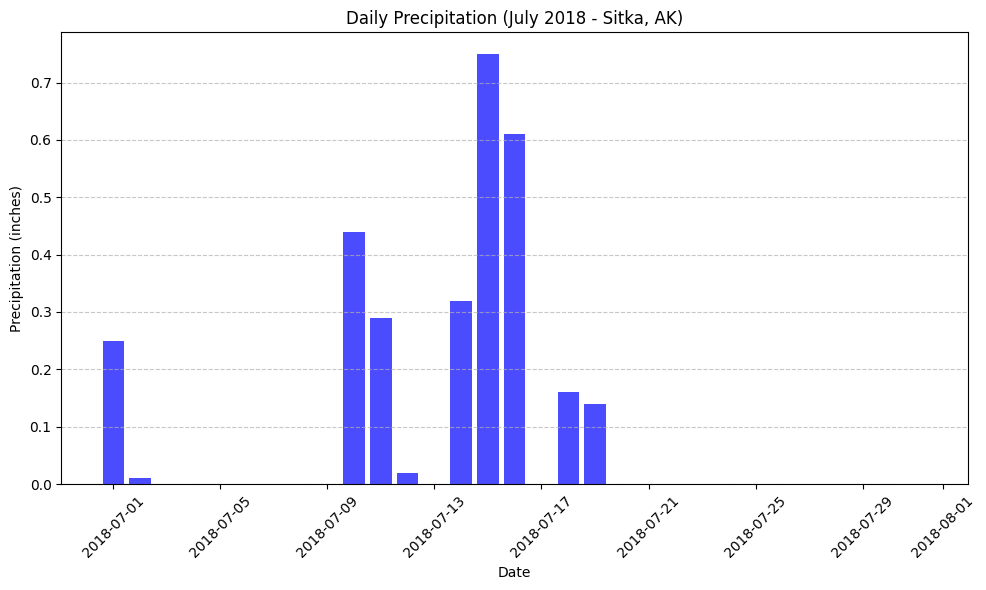

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(df['DATE'], df['PRCP'], color='blue', alpha=0.7)
plt.title('Daily Precipitation (July 2018 - Sitka, AK)')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


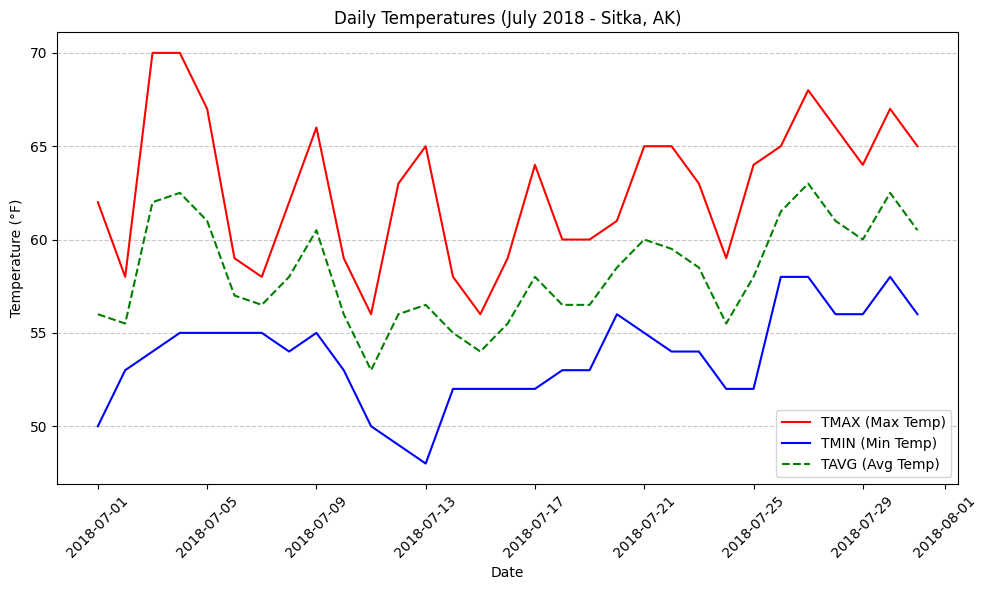

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(df['DATE'], df['TMAX'], label='TMAX (Max Temp)', color='red')
plt.plot(df['DATE'], df['TMIN'], label='TMIN (Min Temp)', color='blue')
plt.plot(df['DATE'], df['TAVG'], label='TAVG (Avg Temp)', color='green', linestyle='--')
plt.title('Daily Temperatures (July 2018 - Sitka, AK)')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
